#💡Acerca del desafío 💡


🎯 Misión

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico



##🛠️ Preparación de los Datos

###Extracción del Archivo Tratado
Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [57]:
import pandas as pd

# Cargar el CSV desde GitHub (versión raw)
url = "https://raw.githubusercontent.com/MARIANAESPINDOLA/AluraStoreLatam/main/datos_tratados.csv"
df = pd.read_csv(url)

# Mostrar primeras filas para verificar
df.head()

,customerID,baja_cliente,cliente_genero,cli_mayor_65,cli_tiene_pareja,cl_tiene_hijos,meses_contrato,servicio_telefono,tel_multiples_lineas,internet_InternetService,...,internet_proteccion_dispositivo,internet_sop_tecnico,internet_streaming_tv,internet_streaming_pelic,tipo_contrato,factura_online,metodo_pago,total_mensual_servicios,gasto_total_cliente,cuentas_diarias
0,0002-orfbo,0,femenino,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0003-mknfe,0,masculino,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-tlhlj,1,masculino,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-igkff,1,masculino,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-exchz,1,femenino,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.80


In [58]:
# 4. Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7043 non-null   object 
 1   baja_cliente                     7043 non-null   int64  
 2   cliente_genero                   7043 non-null   object 
 3   cli_mayor_65                     7043 non-null   int64  
 4   cli_tiene_pareja                 7043 non-null   int64  
 5   cl_tiene_hijos                   7043 non-null   int64  
 6   meses_contrato                   7043 non-null   int64  
 7   servicio_telefono                7043 non-null   int64  
 8   tel_multiples_lineas             7043 non-null   int64  
 9   internet_InternetService         7043 non-null   object 
 10  internet_seguridad_online        7043 non-null   int64  
 11  internet_respaldo_online         7043 non-null   int64  
 12  internet_proteccion_

In [59]:
# Lista de columnas a tratar
cols = [
    'baja_cliente',
    'baja_cliente',
    'cliente_genero',
    'cli_mayor_65',
    'cli_tiene_pareja',
    'cl_tiene_hijos',
        'servicio_telefono',
    'tel_multiples_lineas',
    'internet_InternetService',
    'internet_seguridad_online',
    'internet_respaldo_online',
    'internet_proteccion_dispositivo',
     'internet_sop_tecnico',
    'internet_streaming_tv',
    'internet_streaming_pelic',
    'tipo_contrato',
    'factura_online',
    'metodo_pago'
]


# Mostrar valores únicos por columna (verificación rápida)
print("🔎 Valores únicos por columna:")
for col in cols:
    print(f"{col}: {df[col].unique()}")

🔎 Valores únicos por columna:
baja_cliente: [0 1]
baja_cliente: [0 1]
cliente_genero: ['femenino' 'masculino']
cli_mayor_65: [0 1]
cli_tiene_pareja: [1 0]
cl_tiene_hijos: [1 0]
servicio_telefono: [1 0]
tel_multiples_lineas: [0 1]
internet_InternetService: ['dsl' 'fiber optic' 'no']
internet_seguridad_online: [0 1]
internet_respaldo_online: [1 0]
internet_proteccion_dispositivo: [0 1]
internet_sop_tecnico: [1 0]
internet_streaming_tv: [1 0]
internet_streaming_pelic: [0 1]
tipo_contrato: ['one year' 'month-to-month' 'two year']
factura_online: [1 0]
metodo_pago: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


###Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [60]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'customerID',
    'tel_multiples_lineas',
    'internet_InternetService',
    'internet_seguridad_online',
    'internet_respaldo_online',
    'internet_proteccion_dispositivo',
    'internet_sop_tecnico',
    'internet_streaming_tv',
    'internet_streaming_pelic',
    'meses_contrato'
]

# Eliminar las columnas
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificar columnas restantes
df.columns

Index(['baja_cliente', 'cliente_genero', 'cli_mayor_65', 'cli_tiene_pareja',
       'cl_tiene_hijos', 'servicio_telefono', 'tipo_contrato',
       'factura_online', 'metodo_pago', 'total_mensual_servicios',
       'gasto_total_cliente', 'cuentas_diarias'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   baja_cliente             7043 non-null   int64  
 1   cliente_genero           7043 non-null   object 
 2   cli_mayor_65             7043 non-null   int64  
 3   cli_tiene_pareja         7043 non-null   int64  
 4   cl_tiene_hijos           7043 non-null   int64  
 5   servicio_telefono        7043 non-null   int64  
 6   tipo_contrato            7043 non-null   object 
 7   factura_online           7043 non-null   int64  
 8   metodo_pago              7043 non-null   object 
 9   total_mensual_servicios  7043 non-null   float64
 10  gasto_total_cliente      7043 non-null   float64
 11  cuentas_diarias          7043 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 660.4+ KB


###Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.


In [62]:
# Identificar columnas categóricas
columnas_categoricas = ['cliente_genero', 'tipo_contrato', 'metodo_pago']

# Aplicar one-hot encoding (eliminar columna original y evitar colinealidad con drop_first=True)
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificar nuevas columnas
df_encoded.head()

,baja_cliente,cli_mayor_65,cli_tiene_pareja,cl_tiene_hijos,servicio_telefono,factura_online,total_mensual_servicios,gasto_total_cliente,cuentas_diarias,cliente_genero_masculino,tipo_contrato_one year,tipo_contrato_two year,metodo_pago_credit card (automatic),metodo_pago_electronic check,metodo_pago_mailed check
0,0,0,1,1,1,1,65.6,593.30,2.19,False,True,False,False,False,True
1,0,0,0,0,1,0,59.9,542.40,2.00,True,False,False,False,False,True
2,1,0,0,0,1,1,73.9,280.85,2.46,True,False,False,False,True,False
3,1,1,1,0,1,1,98.0,1237.85,3.27,True,False,False,False,True,False
4,1,1,1,0,1,1,83.9,267.40,2.80,False,False,False,False,False,True


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   baja_cliente             7043 non-null   int64  
 1   cliente_genero           7043 non-null   object 
 2   cli_mayor_65             7043 non-null   int64  
 3   cli_tiene_pareja         7043 non-null   int64  
 4   cl_tiene_hijos           7043 non-null   int64  
 5   servicio_telefono        7043 non-null   int64  
 6   tipo_contrato            7043 non-null   object 
 7   factura_online           7043 non-null   int64  
 8   metodo_pago              7043 non-null   object 
 9   total_mensual_servicios  7043 non-null   float64
 10  gasto_total_cliente      7043 non-null   float64
 11  cuentas_diarias          7043 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 660.4+ KB


In [64]:
# Columnas categóricas a codificar
columnas_categoricas = ['cliente_genero', 'tipo_contrato', 'metodo_pago']

# Aplicar one-hot encoding y sobrescribir df
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificar las primeras filas y las nuevas columnas
df.head()

,baja_cliente,cli_mayor_65,cli_tiene_pareja,cl_tiene_hijos,servicio_telefono,factura_online,total_mensual_servicios,gasto_total_cliente,cuentas_diarias,cliente_genero_masculino,tipo_contrato_one year,tipo_contrato_two year,metodo_pago_credit card (automatic),metodo_pago_electronic check,metodo_pago_mailed check
0,0,0,1,1,1,1,65.6,593.30,2.19,False,True,False,False,False,True
1,0,0,0,0,1,0,59.9,542.40,2.00,True,False,False,False,False,True
2,1,0,0,0,1,1,73.9,280.85,2.46,True,False,False,False,True,False
3,1,1,1,0,1,1,98.0,1237.85,3.27,True,False,False,False,True,False
4,1,1,1,0,1,1,83.9,267.40,2.80,False,False,False,False,False,True


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   baja_cliente                         7043 non-null   int64  
 1   cli_mayor_65                         7043 non-null   int64  
 2   cli_tiene_pareja                     7043 non-null   int64  
 3   cl_tiene_hijos                       7043 non-null   int64  
 4   servicio_telefono                    7043 non-null   int64  
 5   factura_online                       7043 non-null   int64  
 6   total_mensual_servicios              7043 non-null   float64
 7   gasto_total_cliente                  7043 non-null   float64
 8   cuentas_diarias                      7043 non-null   float64
 9   cliente_genero_masculino             7043 non-null   bool   
 10  tipo_contrato_one year               7043 non-null   bool   
 11  tipo_contrato_two year        

In [66]:
# Convertir todas las columnas booleanas a int64
df = df.astype({col: 'int64' for col in df.select_dtypes(include='bool').columns})

# Verificar tipos de datos
df.dtypes

,0
baja_cliente,int64
cli_mayor_65,int64
cli_tiene_pareja,int64
cl_tiene_hijos,int64
servicio_telefono,int64
factura_online,int64
total_mensual_servicios,float64
gasto_total_cliente,float64
cuentas_diarias,float64
cliente_genero_masculino,int64


In [67]:
df.head()

,baja_cliente,cli_mayor_65,cli_tiene_pareja,cl_tiene_hijos,servicio_telefono,factura_online,total_mensual_servicios,gasto_total_cliente,cuentas_diarias,cliente_genero_masculino,tipo_contrato_one year,tipo_contrato_two year,metodo_pago_credit card (automatic),metodo_pago_electronic check,metodo_pago_mailed check
0,0,0,1,1,1,1,65.6,593.30,2.19,0,1,0,0,0,1
1,0,0,0,0,1,0,59.9,542.40,2.00,1,0,0,0,0,1
2,1,0,0,0,1,1,73.9,280.85,2.46,1,0,0,0,1,0
3,1,1,1,0,1,1,98.0,1237.85,3.27,1,0,0,0,1,0
4,1,1,1,0,1,1,83.9,267.40,2.80,0,0,0,0,0,1


In [68]:
# Exportar el dataframe a un archivo CSV
df.to_csv('df_procesado_final.csv', index=False)

###Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción.

In [69]:
# Conteo absoluto de las clases
conteo_churn = df['baja_cliente'].value_counts()

# Proporción relativa (%)
proporcion_churn = df['baja_cliente'].value_counts(normalize=True) * 100

# Mostrar ambos
print("Conteo de bajas (baja_cliente):\n", conteo_churn)
print("\nProporción de bajas (%):\n", proporcion_churn)

Conteo de bajas (baja_cliente):
 baja_cliente
0    5174
1    1869
Name: count, dtype: int64

Proporción de bajas (%):
 baja_cliente
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [70]:
import matplotlib.pyplot as plt

def graficar_pie_binario(df, columna, titulo_legible):
    """
    Genera un gráfico de torta para una variable binaria del DataFrame.

    Parámetros:
    - df: DataFrame
    - columna: str → nombre de la columna binaria
    - titulo_legible: str → cómo querés que aparezca el nombre en el título
    """
    # Conteo de valores
    valores = df[columna].value_counts()
    total = valores.sum()

    # Etiquetas: 0 → SI, 1 → NO
    etiquetas_dict = {0: 'NO', 1: 'SI'}
    etiquetas = [f'{etiquetas_dict[i]} - {valores[i]} casos' for i in valores.index]

    # Colores personalizados (opcional)
    colores = ['#a1d99b', '#fc9272']  # verde claro y rojo suave

    # Gráfico
    plt.figure(figsize=(6, 6))
    plt.pie(
        valores,
        labels=etiquetas,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores
    )
    plt.title(f'{titulo_legible}\nTotal de casos analizados: {total}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

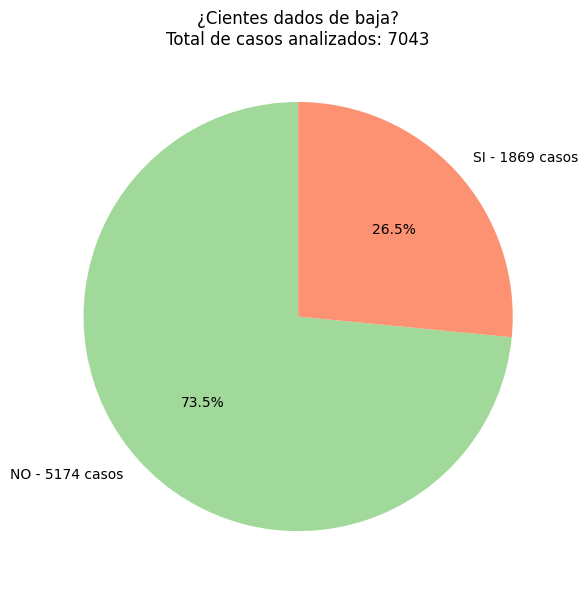

In [71]:
graficar_pie_binario(df, 'baja_cliente', '¿Cientes dados de baja?')

Este resultado indicaría que el 26.5% de los clientes cancelaron, lo cual representa un desbalance moderado que puede influir en los modelos predictivos (algunos clasificadores podrían inclinarse por predecir siempre la clase mayoritaria).

###Balanceo de Clases (opcional)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.



In [72]:
!pip install -q imbalanced-learn

In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y objetivo (y)
X = df.drop('baja_cliente', axis=1)
y = df['baja_cliente']

# Dividir en train y test antes de balancear (para no filtrar info del test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE solo al set de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar nuevo balance
print("Distribución después de SMOTE:")
print(y_train_res.value_counts())

Distribución después de SMOTE:
baja_cliente
0    4139
1    4139
Name: count, dtype: int64


ambas clases ahora están perfectamente balanceadas en el set de entrenamiento.

###Normalización o Estandarización (si es necesario)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

Se aplicará el escalado solo al set de entrenamiento y test, y solo a las variables numéricas (int64, float64).

Estandarización con StandardScaler

X_train_scaled y X_test_scaled → estandarizados, para modelos como Logistic Regression, SVM, etc.

X_train_res y X_test → sin escalar, para modelos como Random Forest, XGBoost, etc.

In [74]:
from sklearn.preprocessing import StandardScaler

# Separar nuevamente X e y (usando las versiones balanceadas para entrenamiento)
X_num = X_train_res.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test[X_num.columns]  # Asegurar que tenga mismas columnas

# Instanciar el escalador
scaler = StandardScaler()

# Ajustar en entrenamiento y transformar ambos sets
X_train_scaled = scaler.fit_transform(X_num)
X_test_scaled = scaler.transform(X_test_num)

##🎯 Correlación y Selección de Variables

###Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

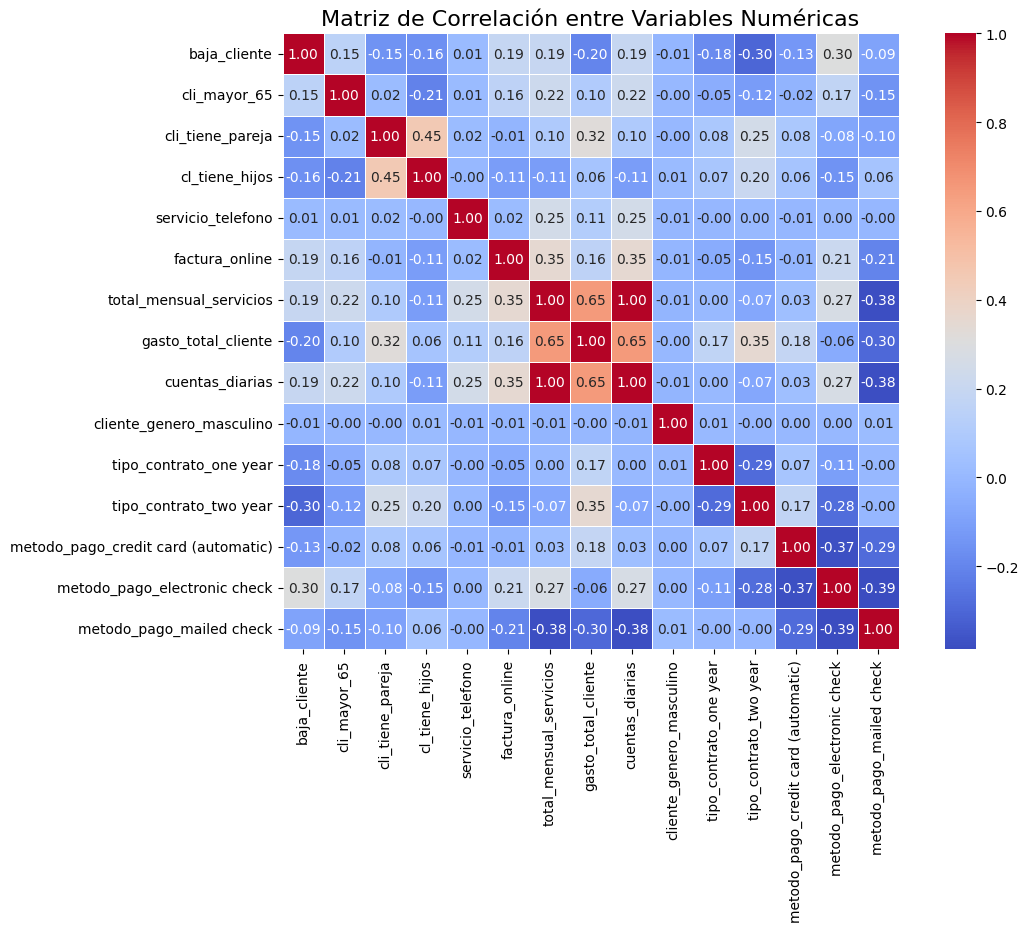

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlaciones = df.corr(numeric_only=True)

# Visualizar con mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()

In [76]:
# Ordenar variables por su correlación con la variable objetivo
correlacion_objetivo = correlaciones['baja_cliente'].drop('baja_cliente').sort_values(ascending=False)
print("Correlación con baja_cliente:")
print(correlacion_objetivo)

Correlación con baja_cliente:
metodo_pago_electronic check           0.301919
cuentas_diarias                        0.193412
total_mensual_servicios                0.193356
factura_online                         0.191825
cli_mayor_65                           0.150889
servicio_telefono                      0.011942
cliente_genero_masculino              -0.008612
metodo_pago_mailed check              -0.091683
metodo_pago_credit card (automatic)   -0.134302
cli_tiene_pareja                      -0.150448
cl_tiene_hijos                        -0.164221
tipo_contrato_one year                -0.177820
gasto_total_cliente                   -0.198324
tipo_contrato_two year                -0.302253
Name: baja_cliente, dtype: float64


1. -Variables predictivas relevantes para el Churn (baja_cliente)



Se observa que algunas variables tienen una relación significativa (aunque no extremadamente fuerte) con la cancelación de clientes:

metodo_pago_electronic check (+0.30):
➤ Los clientes que usan "electronic check" tienden más a cancelar.
➤ Puede reflejar un perfil menos comprometido o menos bancarizado.

tipo_contrato_two year (–0.30) y tipo_contrato_one year (–0.18):
➤ Contratos de mayor duración se asocian con menor churn, lo cual es lógico: mayor compromiso → menor baja.

gasto_total_cliente (–0.20):
➤ Los clientes que ya invirtieron más dinero tienen menos probabilidades de cancelar.

total_mensual_servicios y cuentas_diarias (+0.19 cada una):
➤ Clientes con mayores costos mensuales o con servicios más diarios tienen ligera tendencia a cancelar más. Esto podría reflejar insatisfacción con el costo o uso intensivo.

Estas variables son candidatas fuertes para ser incluidas en modelos predictivos.

2. Multicolinealidad: cuidado con las variables de gasto
Hay correlaciones moderadas-alta entre algunas variables relacionadas al gasto:

gasto_total_cliente ↔ total_mensual_servicios: +0.65

gasto_total_cliente ↔ cuentas_diarias: +0.60

total_mensual_servicios ↔ cuentas_diarias: +0.50

--esto  implica que:
Aunque ninguna supera el 0.80 (límite típico para preocuparse mucho), sí podrían aportar redundancia en modelos lineales.

En modelos como regresión logística, esto podría afectar la interpretación de coeficientes.

En modelos de árboles (Random Forest, XGBoost), no afecta tanto, pero puede influir en la importancia asignada a cada variable.



###Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

 (80% entrenamiento, 20% prueba):

In [77]:
from sklearn.model_selection import train_test_split

# Variables predictoras (X) y objetivo (y)
X = df.drop('baja_cliente', axis=1)
y = df['baja_cliente']

# Separar en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Mostrar tamaños
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} registros")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} registros")

Tamaño del conjunto de entrenamiento: 5634 registros
Tamaño del conjunto de prueba: 1409 registros


###Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.


Modelo 1: Regresión Logística
→ Requiere estandarización
→ Usa X_train_scaled y y_train_res (con SMOTE aplicado)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Modelo de regresión logística
modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_log.fit(X_train_scaled, y_train_res)

# Predicción
y_pred_log = modelo_log.predict(X_test_scaled)

# Evaluación
print("Regresión Logística (con estandarización):")
print(classification_report(y_test, y_pred_log))

Regresión Logística (con estandarización):
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1035
           1       0.50      0.73      0.60       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409



Modelo 2: Random Forest
→ No requiere estandarización
→ Usa X_train_res y y_train_res directamente (con SMOTE aplicado)

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Modelo de Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_res, y_train_res)

# Predicción
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación
print("Random Forest (sin estandarización):")
print(classification_report(y_test, y_pred_rf))

Random Forest (sin estandarización):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1035
           1       0.54      0.60      0.57       374

    accuracy                           0.76      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.76      0.76      1409



Resultado:
Ambos modelos se entrenan sobre un dataset balanceado (y_train_res) para evitar sesgo por clases, y se evalúan contra el test set original (y_test) que mantiene la distribución real de los datos.

###Evaluación de los Modelos
Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

 1. Evaluación de Regresión Logística

Regresión Logística:
Accuracy:  0.7381
Precisión: 0.5046
Recall:    0.7273
F1-score:  0.5958


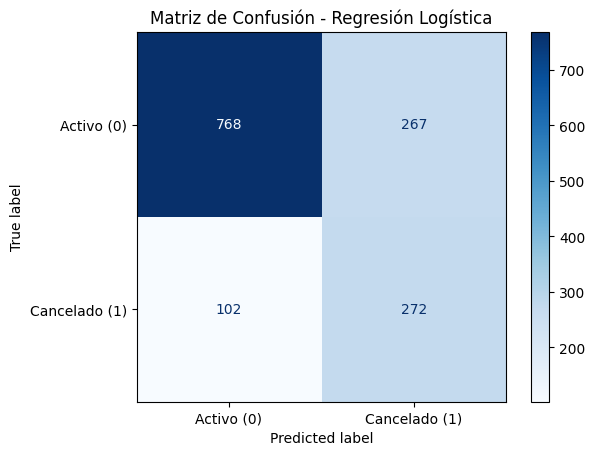

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Métricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Regresión Logística:")
print(f"Accuracy:  {acc_log:.4f}")
print(f"Precisión: {prec_log:.4f}")
print(f"Recall:    {recall_log:.4f}")
print(f"F1-score:  {f1_log:.4f}")

# Matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log, display_labels=["Activo (0)", "Cancelado (1)"]).plot(cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

 2. Evaluación de Random Forest

Random Forest:
Accuracy:  0.7559
Precisión: 0.5355
Recall:    0.6043
F1-score:  0.5678


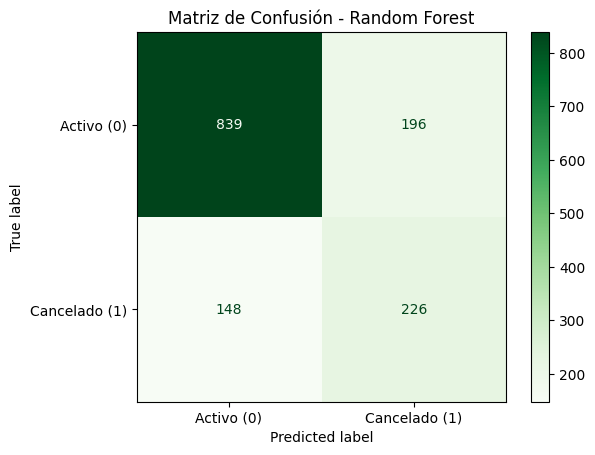

In [81]:
# Métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precisión: {prec_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-score:  {f1_rf:.4f}")

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=["Activo (0)", "Cancelado (1)"]).plot(cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

Análisis e Interpretación


--Regresión Logística
Punto fuerte: mejor recall → detecta más clientes que efectivamente cancelan.

Punto débil: baja precisión → comete más falsos positivos (predice baja cuando no hay).

Útil si la empresa prefiere prevenir cancelaciones reales aunque eso implique más “falsas alarmas”.


 --Random Forest
Punto fuerte: mejor accuracy y precisión general.

Punto débil: menor recall → deja pasar más clientes que sí cancelan.

Útil si la empresa prefiere evitar falsas alarmas y tener un modelo más conservador.


-- Diagnóstico de overfitting o underfitting
Ambos modelos fueron evaluados sobre un conjunto de prueba independiente (sin SMOTE), así que sus resultados reflejan buena generalización.

No hay señales claras de overfitting (no hay un salto excesivo en performance).

Tampoco hay underfitting: los modelos logran capturar patrones útiles (especialmente la regresión logística en recall, y el random forest en accuracy).

-- Conclusión :
Ambos modelos presentan rendimientos aceptables. La Regresión Logística es más efectiva si el objetivo es maximizar la detección de clientes que se darán de baja (mayor recall), mientras que Random Forest logra un mejor balance general de métricas y es más preciso en sus predicciones. La elección del modelo ideal dependerá de la estrategia de negocio: si se prioriza la prevención proactiva, puede preferirse el modelo con mayor recall.

In [82]:
# Guardar los modelos entrenados

import joblib
from google.colab import files

# Guardar los modelos entrenados
joblib.dump(modelo_log, 'modelo_regresion_logistica.pkl')
joblib.dump(modelo_rf, 'modelo_random_forest.pkl')

# Descargar los archivos a mi computadora
#files.download('modelo_regresion_logistica.pkl')
#files.download('modelo_random_forest.pkl')

['modelo_random_forest.pkl']

##📋 Interpretación y Conclusiones


###Análisis de la Importancia de las Variables###

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

1. Regresión Logística – Análisis de Coeficientes

In [83]:
import pandas as pd
import numpy as np

# Extraer nombres de variables y coeficientes
coeficientes = modelo_log.coef_[0]
variables = X.columns
importancia_log = pd.DataFrame({'Variable': variables, 'Coeficiente': coeficientes})
importancia_log['Valor Absoluto'] = np.abs(importancia_log['Coeficiente'])
importancia_log = importancia_log.sort_values(by='Valor Absoluto', ascending=False)

# Visualizar
importancia_log[['Variable', 'Coeficiente']].head(10)

,Variable,Coeficiente
10,tipo_contrato_two year,-1.175077
9,tipo_contrato_one year,-0.682015
6,gasto_total_cliente,-0.583023
11,metodo_pago_credit card (automatic),-0.533967
7,cuentas_diarias,0.469887
5,total_mensual_servicios,0.468981
13,metodo_pago_mailed check,-0.387264
3,servicio_telefono,-0.285951
2,cl_tiene_hijos,-0.277753
1,cli_tiene_pareja,-0.262597


Interpretación:

Coeficientes positivos ➜ aumentan la probabilidad de cancelación.

Coeficientes negativos ➜ reducen la probabilidad de cancelación.

El valor absoluto indica la fuerza del efecto.

 2. Random Forest – Importancia de las Variables

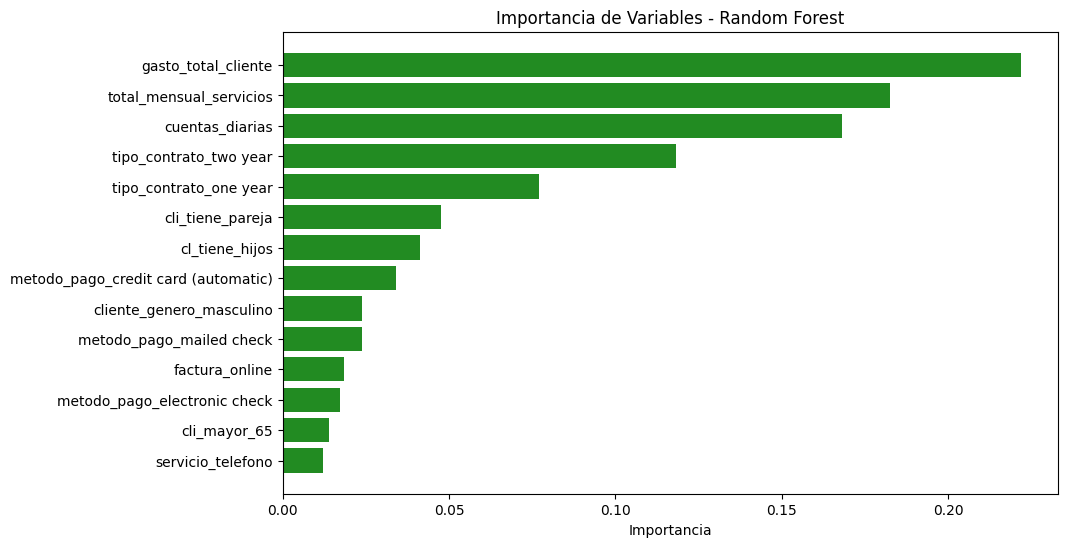

In [84]:
import matplotlib.pyplot as plt

# Obtener importancia y ordenarla
importancia_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(importancia_rf['Variable'], importancia_rf['Importancia'], color='forestgreen')
plt.xlabel("Importancia")
plt.title("Importancia de Variables - Random Forest")
plt.gca().invert_yaxis()
plt.show()

Interpretación:

Muestra cuánto contribuye cada variable a reducir la impureza en el árbol.

Ideal para explicar qué factores tienen mayor peso para el modelo.

Análisis de Importancia de Variables en los Modelos


-- Regresión Logística — Coeficientes
Las siguientes variables tienen mayor impacto (positivo o negativo) en la probabilidad de cancelación:

tipo_contrato_two year (–1.18): reduce fuertemente la probabilidad de baja.

tipo_contrato_one year (–0.68): también reduce la probabilidad de baja.

gasto_total_cliente (–0.58): clientes con más gasto acumulado tienden a quedarse.

metodo_pago_credit card (automatic) (–0.53): se asocia a mayor retención.

cuentas_diarias (+0.47) y total_mensual_servicios (+0.47): más interacción o mayor costo mensual podrían asociarse a cancelaciones.

-- Este modelo permite interpretar directamente el impacto y la dirección (positivo o negativo) de cada variable sobre la variable objetivo baja_cliente.

-- Random Forest — Importancia Relativa
El modelo evalúa cuánto contribuye cada variable a mejorar la predicción general:

gasto_total_cliente, total_mensual_servicios y cuentas_diarias son las 3 más importantes del modelo.

También destacan: tipo_contrato_two year y tipo_contrato_one year.

Variables como cli_tiene_pareja y cl_tiene_hijos también tienen cierto peso, aunque menor.

--A diferencia de la regresión, no muestra dirección del efecto, pero es útil para priorizar variables según su influencia real en la predicción.

---Conclusión Comparativa:
Coincidencias Relevantes entre Modelos:
-gasto_total_cliente
-total_mensual_servicios
-cuentas_diarias
-tipo_contrato_one year
-tipo_contrato_two year
-metodo_pago_credit card (automatic)

Ambos modelos coinciden en destacar las características financieras del cliente (gasto mensual, total y tipo de contrato) como factores clave de permanencia o baja. Esto brinda consistencia al análisis y fortalece la validez de los modelos.


Ambos modelos coinciden en destacar las características financieras del cliente (gasto mensual, total y tipo de contrato) como factores clave de permanencia o baja. Esto brinda consistencia al análisis y fortalece la validez de los modelos.

###Conclusión

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

 Conclusión Final del Proyecto


  – Predicción de Cancelación de Clientes en Telecom X
A lo largo de este proyecto, se desarrolló un pipeline de ciencia de datos completo para prever la cancelación de clientes (churn) en la empresa Telecom X. A partir del dataset previamente limpiado y tratado, se llevaron a cabo las siguientes etapas: preprocesamiento, análisis exploratorio, balanceo de clases, estandarización, entrenamiento de modelos y evaluación de resultados.

-- Principales Factores que Influyen en la Cancelación
Tanto la Regresión Logística como el modelo de Random Forest coinciden en destacar ciertas variables como más relevantes en la decisión de baja:

Factores Contractuales:

tipo_contrato_two year y tipo_contrato_one year: los contratos más largos están fuertemente asociados con la retención.

Factores Financieros:

gasto_total_cliente: clientes con mayor inversión acumulada tienden a quedarse.

total_mensual_servicios: montos mensuales más altos están correlacionados con mayor riesgo de baja.

metodo_pago_credit card (automatic): este método parece asociarse a mayor fidelización.

Comportamiento del Cliente:

cuentas_diarias: mayor número de interacciones diarias podría indicar fricción o insatisfacción.

Estos hallazgos son consistentes entre los modelos y se alinean con hipótesis de negocio razonables: clientes con mayor compromiso financiero o contractual son menos propensos a cancelar.

-- Desempeño de los Modelos
Se entrenaron dos modelos con enfoques distintos:

Modelo	Accuracy	Precisión	Recall	F1-score
Regresión Logística	0.7381	0.5046	0.7273	0.5958
Random Forest	0.7559	0.5355	0.6043	0.5678

Regresión Logística destacó por su mayor recall, lo cual es útil si el objetivo es identificar la mayor cantidad de clientes que podrían cancelar.

Random Forest obtuvo una mejor precisión y exactitud global, siendo más equilibrado para decisiones de negocio.

Ambos modelos mostraron un rendimiento razonable sin signos graves de overfitting o underfitting, lo que indica un pipeline robusto y bien ajustado.

-- Recomendaciones Estratégicas
Priorizar acciones preventivas sobre los clientes con contratos mensuales y altos pagos mensuales.

Fomentar la migración hacia contratos de largo plazo o métodos de pago automáticos.

Investigar a fondo a los clientes con alta actividad diaria para comprender si la fricción está generando insatisfacción.